In [1]:
# Import packages
import json

import requests
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ingest to df
resp = requests.get('https://pomber.github.io/covid19/timeseries.json')
resp_json_str = resp.text
resp_dict = json.loads(resp_json_str)
l = []
for c, cl in resp_dict.items():
    for d in cl:
        d.update({'country' : c})
        l.append(d)
df = pd.DataFrame(l)

# Filter, transform


In [3]:
# Filter & Transform
ASEAN_COUNTRIES = ['Singapore', 'Thailand', 'Malaysia', 'Indonesia', 'Vietnam', 'Cambodia', 'Philippines', 'Brunei']
asean_dfs = []
for c in ASEAN_COUNTRIES:
    df_c = df[df.country==c].copy()
    df_c['date'] = pd.to_datetime(df_c['date'], format='%Y-%m-%d')
    df_c['date'] = df_c['date'].dt.strftime('%Y-%m-%d')
    df_c['date'] = df_c['date'].astype(str)
    # Feature: New cases
    df_c['confirmed_tm1'] = df_c['confirmed'].shift(1)
    df_c['confirmed_tm1'] = df_c['confirmed_tm1'].fillna(0)
    df_c['confirmed_tm1'] = df_c['confirmed_tm1'].astype(int)
    df_c['new'] = df_c['confirmed'] - df_c['confirmed_tm1']
    # Feature: Currently Hospitalised
    df_c['live'] = df_c['confirmed'] - df_c['recovered']
    _ = df_c.reset_index(drop=True, inplace=True)
    print(c)
    display(df_c[['date', 'new', 'confirmed', 'live', 'recovered']].sort_values('date', ascending=True).tail(10).T)
    print(df_c.shape)
    print()
    print()
    asean_dfs.append((c, df_c))

Singapore


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,12,0,10,18,0,22,12,14,17,23
confirmed,150,150,160,178,178,200,212,226,243,266
live,72,72,82,82,82,103,107,121,134,152
recovered,78,78,78,96,96,97,105,105,109,114


(56, 8)


Thailand


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,0,0,3,6,11,5,7,32,33,30
confirmed,50,50,53,59,70,75,82,114,147,177
live,19,19,20,25,36,40,47,79,112,136
recovered,31,31,33,34,34,35,35,35,35,41


(56, 8)


Malaysia


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,6,18,12,20,0,48,41,190,138,107
confirmed,99,117,129,149,149,197,238,428,566,673
live,75,93,105,123,123,171,203,386,524,624
recovered,24,24,24,26,26,26,35,42,42,49


(56, 8)


Indonesia


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,2,13,8,7,0,35,27,21,17,38
confirmed,6,19,27,34,34,69,96,117,134,172
live,6,19,25,32,32,67,88,109,126,164
recovered,0,0,2,2,2,2,8,8,8,8


(56, 8)


Vietnam


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,12,0,1,7,1,8,6,3,5,5
confirmed,30,30,31,38,39,47,53,56,61,66
live,14,14,15,22,23,31,37,40,45,50
recovered,16,16,16,16,16,16,16,16,16,16


(56, 8)


Cambodia


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,1,0,0,1,0,2,2,0,0,26
confirmed,2,2,2,3,3,5,7,7,7,33
live,1,1,1,2,2,4,6,6,6,32
recovered,1,1,1,1,1,1,1,1,1,1


(56, 8)


Philippines


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,4,10,13,16,3,12,47,29,2,45
confirmed,10,20,33,49,52,64,111,140,142,187
live,9,19,31,47,50,62,109,138,140,182
recovered,1,1,2,2,2,2,2,2,2,5


(56, 8)


Brunei


,46,47,48,49,50,51,52,53,54,55
date,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17
new,0,1,0,10,0,26,3,10,4,2
confirmed,0,1,1,11,11,37,40,50,54,56
live,0,1,1,11,11,37,40,50,54,56
recovered,0,0,0,0,0,0,0,0,0,0


(56, 8)




In [4]:
# 2nd graph, used for highlighting DORSCON Orange
x = np.arange(df_c.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

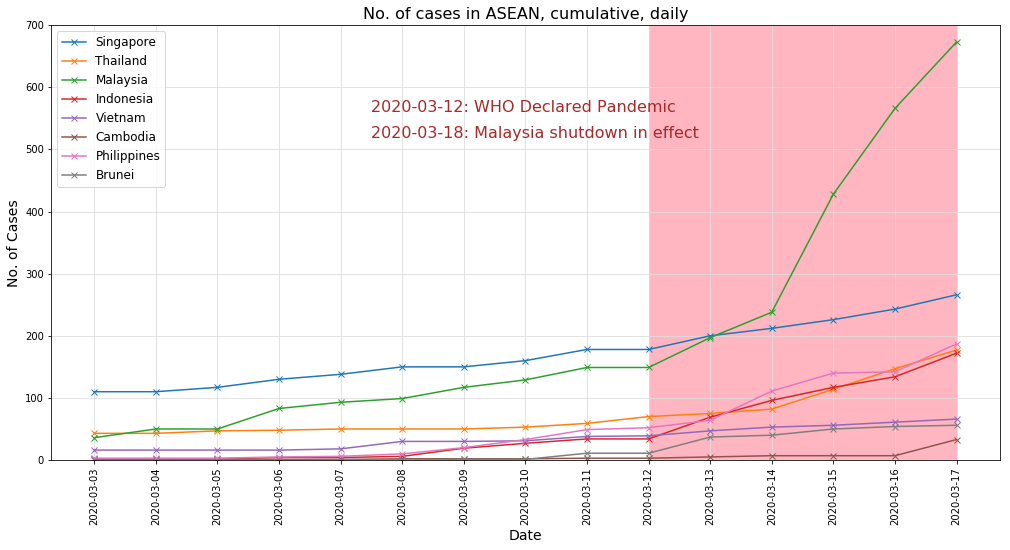

In [5]:
LAST_DAYS = 15
Y_SIZE = 100

fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(1,1,1)
ds = []
d_max_vals = []
for (d, df_d) in asean_dfs:
    # Plot
    df_d.tail(LAST_DAYS).plot(kind='line', x='date', y='confirmed', ax=ax, marker='x', linewidth=1.5)
    ds.append(d)
    d_max_vals.append(df_d.tail(LAST_DAYS)['confirmed'].max())
# df2.tail(LAST_DAYS).plot(kind='line', x='x', y='y', ax=ax, linewidth=0)
# x & y axes
ax.set_xticks(range(LAST_DAYS))
ax.set_xticklabels(df_c['date'].tail(LAST_DAYS), rotation=90)
ax.set_xlabel("Date", fontsize=14)

ylim_max = max(d_max_vals)
ylim_max = (ylim_max//Y_SIZE + 1)*Y_SIZE

ax.set_ylim(0, ylim_max)
ax.set_yticks(range(0,ylim_max+1,Y_SIZE))
ax.set_ylabel("No. of Cases", fontsize=14)
ax.grid(color='GAINSBORO')
ax.legend(ds, fontsize=12)

# WHO Declares Pandemic
df_c_t = df_c.tail(LAST_DAYS).copy()
_ = df_c_t.reset_index(inplace=True, drop=True)
pdm_start_index = df_c_t[df_c_t.date=='2020-03-12'].index[0]
ax.fill_between([pdm_start_index,df_c_t.index.max()], 0, ylim_max, facecolor='LIGHTPINK')
ax.text(pdm_start_index*0.5, ylim_max*0.80,"2020-03-12: WHO Declared Pandemic", fontsize=16, color="BROWN")
ax.text(pdm_start_index*0.5, ylim_max*0.74,"2020-03-18: Malaysia shutdown in effect", fontsize=16, color="BROWN")

ax.set_title("No. of cases in ASEAN, cumulative, daily", fontsize=16)
plt.show()

Sources: 

[Malaysia bars citizens from going overseas, foreigners from entering country for 2 weeks to curb COVID-19 spread: PM Muhyiddin](https://www.channelnewsasia.com/news/asia/malaysia-bars-citizens-overseas-foreigners-entering-covid19-12543454)

[COVID-19 outbreak 'a pandemic': WHO chief](https://www.channelnewsasia.com/news/world/covid-19-coronavirus-pandemic-who-chief-12528328)